<a href="https://www.kaggle.com/code/namle1427/train-ocr-data-aug?scriptVersionId=191640583" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
import imgaug.augmenters as iaa
import imgaug.imgaug

In [2]:
! pip install --quiet vietocr

In [3]:
!git clone https://github.com/pbcquoc/vietocr

Cloning into 'vietocr'...
remote: Enumerating objects: 3214, done.
remote: Counting objects: 100% (743/743), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 3214 (delta 693), reused 657 (delta 657), pack-reused 2471
Receiving objects: 100% (3214/3214), 2.08 MiB | 11.34 MiB/s, done.
Resolving deltas: 100% (2408/2408), done.


In [4]:
%cd '/kaggle/working/vietocr'

/kaggle/working/vietocr


# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [5]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [6]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [7]:
dataset_params = {
    'name':'ocr',
    'data_root':'/kaggle/input/reg-08-08-17-52/reg_08_08_17_52',
    'train_annotation':'rec_gt_train.txt',
    'valid_annotation':'rec_gt_val.txt'
}

params = {
         'print_every':1000,
         'valid_every':2000,
          'iters':40000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 100,
          'batch_size': 16,
    
         }

config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789–!"#$%&()*+,-./:;<=>?@[\]^_`{|}\'~ ðü…“ÜÖūōÐ−öā°²Ū—	’Ō”Ā'
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
config['pretrain'] = '/kaggle/input/weight-ocr-upwrok/transformerocr_22_07.pth'
config['weights'] = '/kaggle/input/weight-ocr-upwrok/transformerocr_22_07.pth'


you can change any of these params in this full list below

In [8]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789–!"#$%&()*+,-./:;<=>?@[\\]^_`{|}\'~ ðü…“ÜÖūōÐ−öā°²Ū—\t’Ō”Ā',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 16,
  'print_every': 1000,
  'valid_every': 2000,
  'iters': 40000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 100},
 'dataset': {'name': 'ocr',
  'data_root': '/kaggle/input/reg-08-08-17-52/reg_08_08_17_52',
  'train_annotation': 'rec_gt_train.txt',
  'valid_annotation': 'rec_gt_val.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'datal

In [9]:
# import shutil

# shutil.rmtree('/kaggle/working/vietocr/train_ocr')
# shutil.rmtree('/kaggle/working/vietocr/valid_ocr')

You should train model from our pretrained

In [10]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Create train_ocr: 100%|████████████████████████████████████████| 2670/2670 [00:16<00:00, 163.77it/s]


Created dataset with 2669 samples


Create valid_ocr: 100%|██████████████████████████████████████████| 400/400 [00:02<00:00, 170.08it/s]


Created dataset with 399 samples


valid_ocr build cluster: 100%|█████████████████████████████████| 399/399 [00:00<00:00, 68096.00it/s]


Save model configuration for inference, load_config_from_file

In [11]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

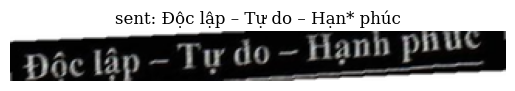

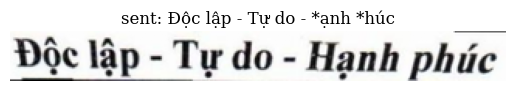

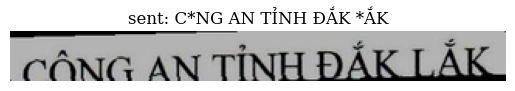

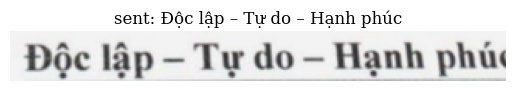

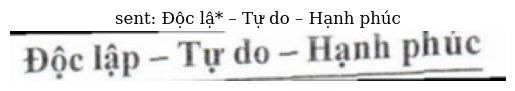

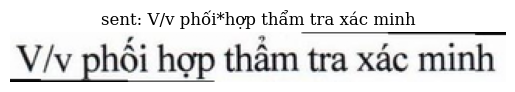

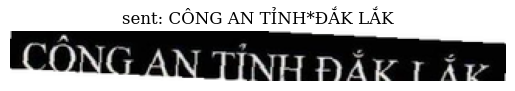

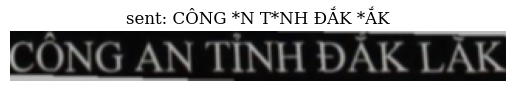

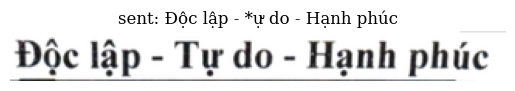

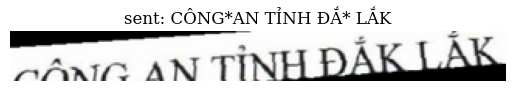

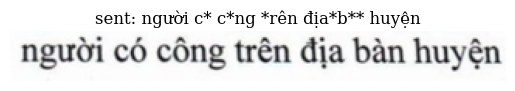

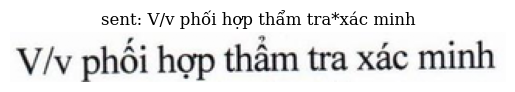

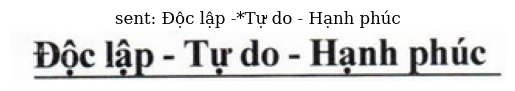

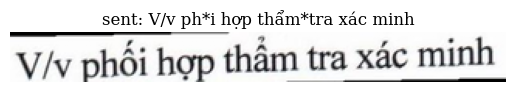

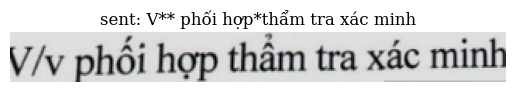

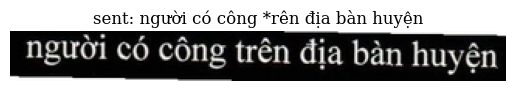

In [12]:
trainer.visualize_dataset()

Train now

In [13]:
trainer.train()

iter: 001000 - train loss: 0.813 - lr: 1.81e-04 - load time: 2.42 - gpu time: 285.21
iter: 002000 - train loss: 0.715 - lr: 5.20e-04 - load time: 2.78 - gpu time: 286.57
iter: 002000 - valid loss: 0.735 - acc full seq: 0.9018 - acc per char: 0.9289
iter: 003000 - train loss: 0.707 - lr: 8.60e-04 - load time: 2.67 - gpu time: 288.37
iter: 004000 - train loss: 0.710 - lr: 1.00e-03 - load time: 2.51 - gpu time: 285.95
iter: 004000 - valid loss: 0.724 - acc full seq: 0.9286 - acc per char: 0.9694
iter: 005000 - train loss: 0.706 - lr: 9.98e-04 - load time: 2.67 - gpu time: 286.57
iter: 006000 - train loss: 0.708 - lr: 9.92e-04 - load time: 2.18 - gpu time: 285.71
iter: 006000 - valid loss: 0.733 - acc full seq: 0.9018 - acc per char: 0.9587
iter: 007000 - train loss: 0.705 - lr: 9.83e-04 - load time: 2.59 - gpu time: 287.79
iter: 008000 - train loss: 0.700 - lr: 9.70e-04 - load time: 2.35 - gpu time: 281.28
iter: 008000 - valid loss: 0.720 - acc full seq: 0.9375 - acc per char: 0.9708
iter